<a href="https://colab.research.google.com/github/mastersithlord/CarBrandClassification/blob/main/CarBrandClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The Car_Brands dataset contains images of cars in full to identify their brands
#https://drive.google.com/file/d/1hQhbR6rJ-NEJxxyAdgLZZojgYMv5z4lR/view?usp=sharing
!gdown --id 1hQhbR6rJ-NEJxxyAdgLZZojgYMv5z4lR
!unzip /content/car_brands.zip

In [1]:
#The Car_Logos dataset contains images of car logos to identify their brands
#https://drive.google.com/file/d/1L-WmNdSQHpkMrOm2p5Wez_JmeuCpXoDd/view?usp=sharing
!gdown --id 1L-WmNdSQHpkMrOm2p5Wez_JmeuCpXoDd
!unzip /content/car_logos.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Renault/Renault16129_small.jpg  
  inflating: images/Renault/Renault16130_small.jpg  
  inflating: images/Renault/Renault16131_small.jpg  
  inflating: images/Renault/Renault16132_small.jpg  
  inflating: images/Renault/Renault16133_small.jpg  
  inflating: images/Renault/Renault16134_small.jpg  
  inflating: images/Renault/Renault16135_small.jpg  
  inflating: images/Renault/Renault16136_small.jpg  
  inflating: images/Renault/Renault16137_small.jpg  
  inflating: images/Renault/Renault16138_small.jpg  
  inflating: images/Renault/Renault16139_small.jpg  
  inflating: images/Renault/Renault16140_small.jpg  
   creating: images/Rover/
  inflating: images/Rover/Rover3662_small.jpg  
  inflating: images/Rover/Rover3663_small.jpg  
  inflating: images/Rover/Rover3664_small.jpg  
  inflating: images/Rover/Rover3665_small.jpg  
  inflating: images/Rover/Rover3666_small.jpg  
  inflating: images/Rover/Rover3667_small.jpg 

In [2]:
import os
os.listdir()

['.config',
 '.ipynb_checkpoints',
 'imagesdontuse',
 'drive',
 'car_brands.zip',
 'images',
 'imgs_zip',
 'imagesdontuse2',
 'car_logos.zip',
 'companies.csv',
 'sample_data']

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing

import pathlib

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file('car_brands.zip', origin=dataset_url, untar=True)
data_dir = preprocessing.image_dataset_from_directory(directory="images")
data_dir = pathlib.Path("images")


Found 20778 files belonging to 41 classes.


In [42]:
type(data_dir)

pathlib.PosixPath

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20778 files belonging to 41 classes.
Using 16623 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20778 files belonging to 41 classes.
Using 4155 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Alfa_Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lancia', 'Land_Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'list.txt']


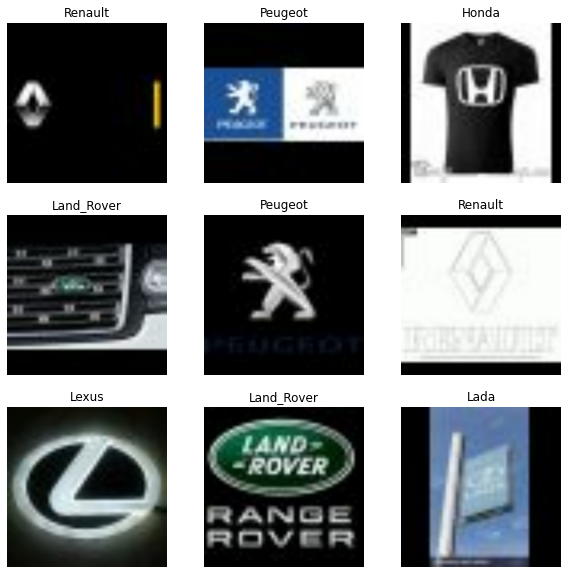

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [25]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [26]:
num_classes = 41

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [29]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
520/520 [==============================] - 517s 994ms/step - loss: 3.3357 - accuracy: 0.1557 - val_loss: 1.9166 - val_accuracy: 0.5499
Epoch 2/10
520/520 [==============================] - 514s 989ms/step - loss: 1.5420 - accuracy: 0.6283 - val_loss: 1.4878 - val_accuracy: 0.6582
Epoch 3/10
520/520 [==============================] - 513s 987ms/step - loss: 0.8527 - accuracy: 0.7862 - val_loss: 1.4504 - val_accuracy: 0.7076
Epoch 4/10
520/520 [==============================] - 512s 984ms/step - loss: 0.4341 - accuracy: 0.8917 - val_loss: 1.5980 - val_accuracy: 0.7201
Epoch 5/10
520/520 [==============================] - 513s 986ms/step - loss: 0.2101 - accuracy: 0.9488 - val_loss: 1.7742 - val_accuracy: 0.7321
Epoch 6/10
520/520 [==============================] - 513s 987ms/step - loss: 0.1354 - accuracy: 0.9725 - val_loss: 2.1027 - val_accuracy: 0.7172
Epoch 7/10
520/520 [==============================] - 512s 985ms/step - loss: 0.1140 - accuracy: 0.9768 - val_loss: 2.1809 -

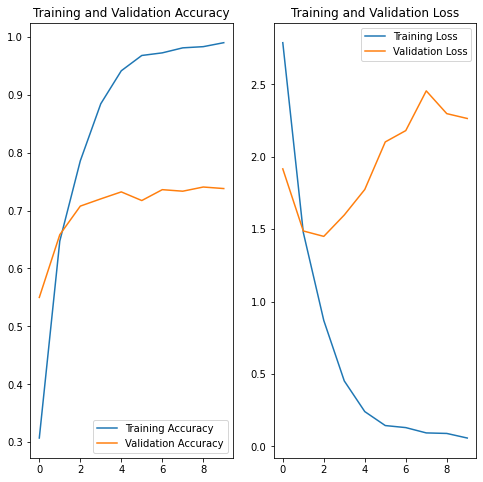

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

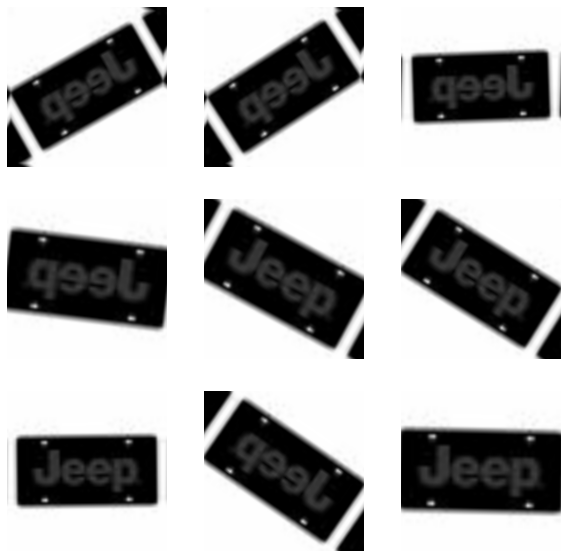

In [32]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [33]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [36]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
520/520 [==============================] - 600s 1s/step - loss: 3.5833 - accuracy: 0.0702 - val_loss: 2.8693 - val_accuracy: 0.2797
Epoch 2/15
520/520 [==============================] - 598s 1s/step - loss: 2.7790 - accuracy: 0.3032 - val_loss: 2.2671 - val_accuracy: 0.4501
Epoch 3/15
520/520 [==============================] - 598s 1s/step - loss: 2.2457 - accuracy: 0.4353 - val_loss: 1.9882 - val_accuracy: 0.5187
Epoch 4/15
520/520 [==============================] - 599s 1s/step - loss: 2.0213 - accuracy: 0.4915 - val_loss: 1.9369 - val_accuracy: 0.5341
Epoch 5/15
520/520 [==============================] - 600s 1s/step - loss: 1.8748 - accuracy: 0.5319 - val_loss: 1.7599 - val_accuracy: 0.5663
Epoch 6/15
520/520 [==============================] - 599s 1s/step - loss: 1.7101 - accuracy: 0.5675 - val_loss: 1.6890 - val_accuracy: 0.6041
Epoch 7/15
520/520 [==============================] - 599s 1s/step - loss: 1.6583 - accuracy: 0.5849 - val_loss: 1.6361 - val_accuracy: 0.6024

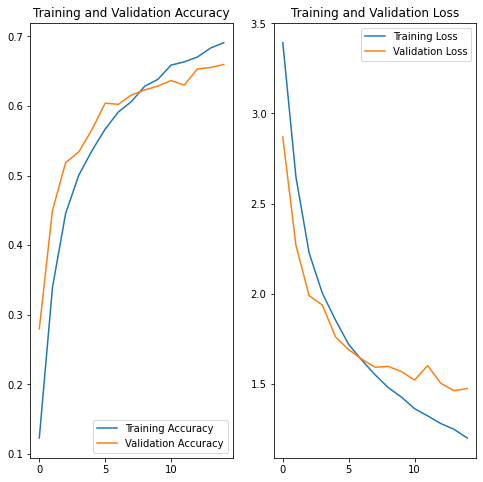

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
#The Car_Logos dataset contains images of car logos to identify their brands
#https://drive.google.com/file/d/1_PNbJmNXgu0_CTT5pK80rE5ssiJ-1FpM/view?usp=sharing
!gdown --id 1_PNbJmNXgu0_CTT5pK80rE5ssiJ-1FpM
!unzip /content/Actual_Data.zip

Downloading...
From: https://drive.google.com/uc?id=1_PNbJmNXgu0_CTT5pK80rE5ssiJ-1FpM
To: /content/Actual_Data.zip
100% 900k/900k [00:00<00:00, 56.8MB/s]
Archive:  /content/Actual_Data.zip
   creating: 09-05-2021/
  inflating: 09-05-2021/09-05-2028_SLF1521H_WS_8_30-12-20 10.12_Photos - After.JPG  
  inflating: 09-05-2021/09-05-2036_SML8032M_WS_8_31-12-20 17.00_Photos - After.JPG  
  inflating: 09-05-2021/09-05-2039_SMN3050H_WS_2_14-01-21 15.00_Photographs after replacement.JPG  
  inflating: 09-05-2021/09-05-2055_GBF8211A_WS_9_05-01-21 13.38_Photos - After.JPG  
  inflating: 09-05-2021/09-05-2065_GBD5742P_WS_9_12-01-21 17.51_AFTER PHOTO.JPG  
  inflating: 09-05-2021/09-05-2083_SKQ413Y_WS_8_12-01-21 13.10_Photos - After.JPG  
  inflating: 09-05-2021/09-05-2091_SMS9643G_WS_12_13-01-21 13.09_After Repair.JPG  
  inflating: 09-05-2021/09-05-2109_SLM5676G_WS_8_14-08-20 10.32_Photos - After.JPG  
  inflating: 09-05-2021/09-05-2119_SLM4705M_WS_7_13-11-20 17.04_Photos - After.JPG  
  inflating

In [50]:
import os
os.listdir("09-05-2021")

['09-05-2255_SLT8956S_WS_10_08-01-21 10.48_Photos - After.JPG',
 '09-05-2036_SML8032M_WS_8_31-12-20 17.00_Photos - After.JPG',
 '09-05-2055_GBF8211A_WS_9_05-01-21 13.38_Photos - After.JPG',
 '09-05-2224_SLK3008J_WS_8_16-02-21 14.11_Photos - After.JPG',
 '09-05-2243_SLT6206L_WS_10_23-02-21 11.58_Photos - After.JPG',
 '09-05-2091_SMS9643G_WS_12_13-01-21 13.09_After Repair.JPG',
 '09-05-2274_SLS7540U_WS_11_23-02-21 11.23_Photos - After.JPG',
 '09-05-2182_SLU7536Y_WS_10_07-01-21 17.00_Photos - After.JPG',
 '09-05-2226_SLM9713G_WS_10_27-01-21 17.24_Photos - After.JPG',
 '09-05-2171_SLT679U_WS_11_08-01-21 10.36_Photos - After.JPG',
 '09-05-2039_SMN3050H_WS_2_14-01-21 15.00_Photographs after replacement.JPG',
 '09-05-2144_SLQ8234H_WS_14_23-02-21 16.45_Photos - After.JPG',
 '09-05-2271_SLZ1554H_WS_7_01-03-21 09.05_Photos - After.JPG',
 '09-05-2164_SLB2347J_WS_8_12-01-21 13.14_Photos - After.JPG',
 '09-05-2065_GBD5742P_WS_9_12-01-21 17.51_AFTER PHOTO.JPG',
 '09-05-2119_SLM4705M_WS_7_13-11-20 17

In [61]:
import pathlib
dataoutput_dir = preprocessing.image.load_img("/content/Honda.png")

#sunflower_url = "https://en.wikipedia.org/wiki/List_of_Honda_automobiles#/media/File:Honda.svg"
#sunflower_path = tf.keras.utils.get_file('Honda', origin=sunflower_url)
dataoutput_dir = pathlib.Path("/content/Honda.png")
img = keras.preprocessing.image.load_img(
    dataoutput_dir, target_size=(img_height, img_width)
)

In [62]:
import pathlib
dataoutput_dir = preprocessing.image.load_img("/content/Honda.png")

#sunflower_url = "https://en.wikipedia.org/wiki/List_of_Honda_automobiles#/media/File:Honda.svg"
#sunflower_path = tf.keras.utils.get_file('Honda', origin=sunflower_url)
dataoutput_dir = pathlib.Path("/content/Honda.png")
img = keras.preprocessing.image.load_img(
    dataoutput_dir, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Dodge with a 46.36 percent confidence.
